In [40]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

from scipy.signal import wiener
from scipy.ndimage import median_filter

In [50]:
ifile = '/data1/antonk/stereoid/RESULTS/SeaIce/SeaIceDrift/pass_20190101T000000Z.nc'
d = {}
with Dataset(ifile) as ds:
    for key in ds.variables.keys():
        d[key] = ds[key][:]

FileNotFoundError: [Errno 2] No such file or directory: b'/data1/antonk/stereoid/RESULTS/SeaIce/SeaIceDrift/pass_20190101T060000Z.nc'

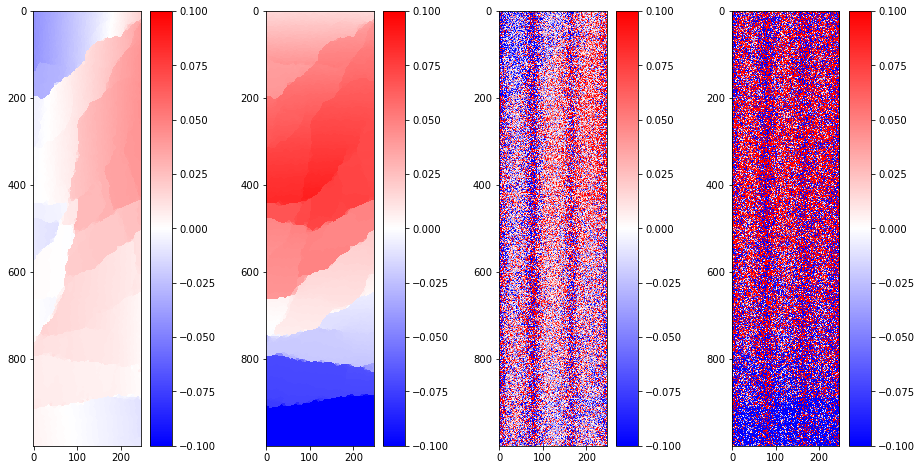

In [42]:
start, stop = 3500, 4500
vmax = 0.1

u, v, uo, vo = [d[i][start:stop] for i in ['u', 'v', 'u_obs', 'v_obs']]

fig, axs = plt.subplots(1,4, figsize=(16,8))
for i, j in enumerate([u, v, uo, vo]):
    imsh = axs[i].imshow(j, clim=[-vmax, vmax], cmap='bwr', interpolation='nearest')
    plt.colorbar(imsh, ax=axs[i])
plt.show()



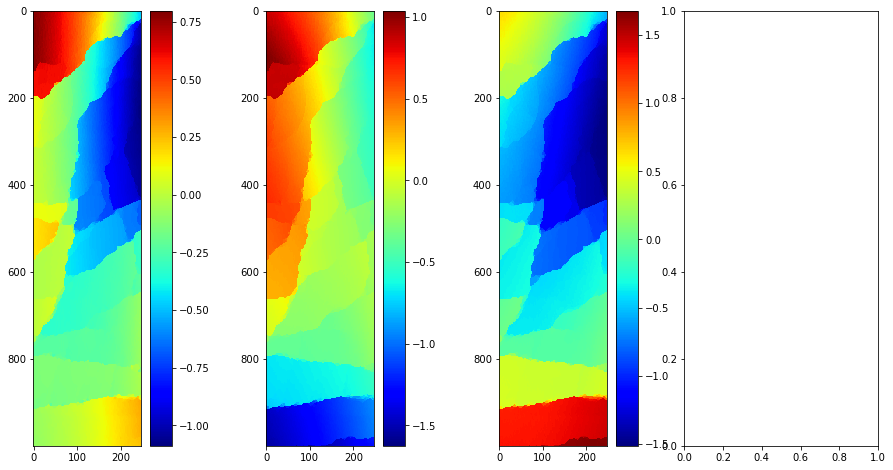

In [49]:
fig, axs = plt.subplots(1,4, figsize=(16,8))
for i in range(3):
    imsh = axs[i].imshow(d['dopp'][start:stop,:,i], cmap='jet', interpolation='nearest')
    plt.colorbar(imsh, ax=axs[i])
plt.show()



In [38]:
wien_filt_size = 15 
uof = wiener(uo, (wien_filt_size,wien_filt_size))
vof = wiener(vo, (wien_filt_size,wien_filt_size))

med_filter_size = 15
uod = median_filter(uo, (med_filter_size,med_filter_size))
vod = median_filter(vo, (med_filter_size,med_filter_size))

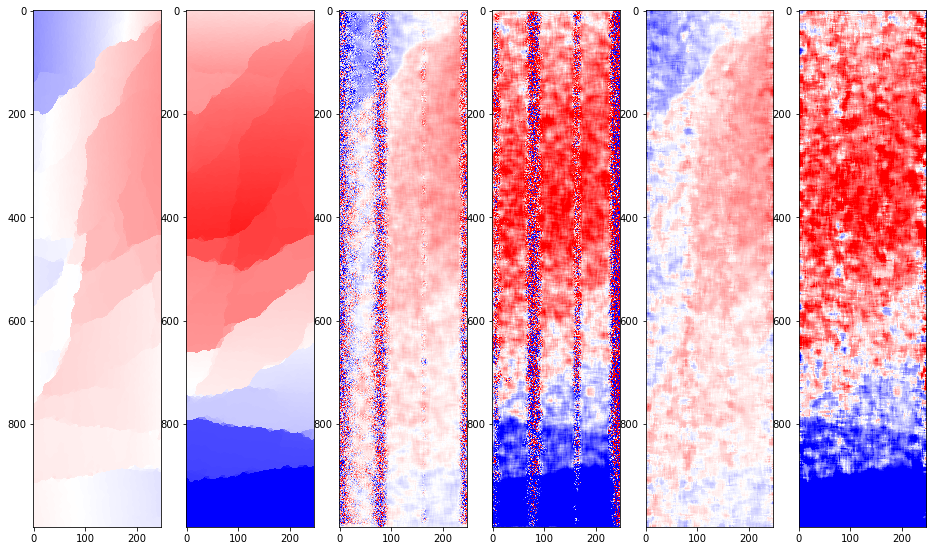

In [39]:
fig, axs = plt.subplots(1,6, figsize=(16,12))
for i, j in enumerate([u, v, uof, vof, uod, vod]):
    imsh = axs[i].imshow(j, clim=[-vmax, vmax], cmap='bwr', interpolation='nearest')
plt.show()
